In [3]:
!pip install nltk

In [4]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\quyen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

# Tokenization

## Sentence Tokenization

In [1]:
text = "Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome. The sky is pinkish-blue. You shouldn't eat cardboard"

In [4]:
from nltk.tokenize import sent_tokenize
tokenize_text = sent_tokenize(text)
print(tokenize_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


## Word Tokenization

In [5]:
from nltk.tokenize import word_tokenize
tokenize_word = word_tokenize(text)
print(tokenize_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


In [6]:
# Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(tokenize_word)
print(fdist)

<FreqDist with 25 samples and 30 outcomes>


In [7]:
fdist.most_common(2)

[('is', 3), (',', 2)]

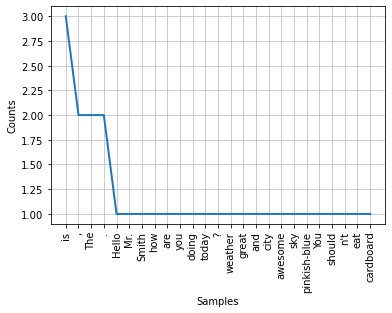

In [8]:
import matplotlib.pyplot as plt 
fdist.plot(30, cumulative=False)
plt.show()

# Remove Stopwords (such as am, is, are, this, a, an , the,...)

In [9]:
import nltk
nltk.download('stopwords')
# nltk.download()

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [10]:
#Stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'not', 'just', 'with', 'ours', "doesn't", 'while', 'nor', 'these', 'between', 'most', 'it', 'its', 'only', 'above', 'against', 'won', 'hasn', 'myself', 'itself', "mustn't", 'as', "that'll", 'has', 'wasn', 'she', 'other', "haven't", 'your', 'that', 'up', 'yourselves', 'doesn', 'herself', 'hers', 'any', 're', "wouldn't", 'where', 'them', 'himself', 'again', 'during', 'was', 'same', 't', 'you', "it's", "hadn't", 'their', "she's", 'on', 'having', 'were', "mightn't", 'him', 'did', 'if', 'very', 'mightn', 'here', 'now', 'hadn', 'all', 'isn', 'am', 'before', 'me', 'ourselves', 'll', 'have', "you'd", 'those', 'he', 'from', 'this', 'which', 'because', 'don', 'about', 'haven', 'of', 'for', 'through', 'be', 'mustn', 'we', 'being', 'does', 'had', 'ma', 'didn', 'theirs', "isn't", "shouldn't", 'under', 'why', 'y', 'once', 's', 'no', 'below', 'and', 'further', "you'll", 'doing', 'is', 'but', 'off', 'wouldn', 'some', 'they', 'o', "couldn't", 'an', 'at', 'yourself', 'couldn', 'both', 'shan', 'm', 'whe

In [11]:
#Remove Stopwords
filtered_sent = []
for w in tokenize_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized sentence: ", tokenize_word)
print("Filtered sentence: ", filtered_sent)

Tokenized sentence:  ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']
Filtered sentence:  ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']


## Lexicon Normalization
 For example, connection, connected, connecting word reduce to a common word "connect". 

### Stemming

In [12]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words = []

for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']
Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesom', '.', 'the', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard']


In [13]:
import nltk 
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [14]:
# Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemma: ", lem.lemmatize(word, "v"))
print("Stem: ", stem.stem(word))

Lemma:  fly
Stem:  fli


## POS Tagging
https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [15]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."
tokens = nltk.word_tokenize(sent)
print(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


In [16]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


False

In [17]:
nltk.pos_tag(tokens)

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

# Sentiment Analysis

In [5]:
import pandas as pd
data=pd.read_csv('train.tsv', sep='\t')

In [6]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [8]:
length_data = data.Phrase.str.len()
length_data

0         188
1          77
2           8
3           1
4           6
         ... 
156055      9
156056     25
156057     18
156058      9
156059      8
Name: Phrase, Length: 156060, dtype: int64

In [22]:
print("Data dài nhất: ",max(length_data))

Data dài nhất:  283


In [23]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [24]:
ratio = data.Sentiment.value_counts()/len(data)
print("Tỷ lệ sentiment trong data:\n", ratio)

Tỷ lệ sentiment trong data:
 2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64


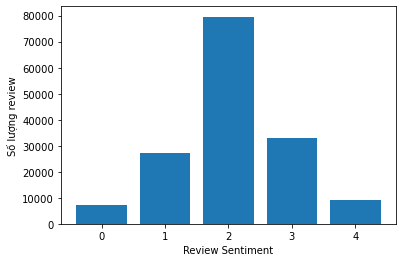

In [25]:
sentiment_count = data.groupby("Sentiment").count()
plt.bar(sentiment_count.index.values, sentiment_count['Phrase'])
plt.xlabel("Review Sentiment")
plt.ylabel("Số lượng review")
plt.show()

In [26]:
# sentiment_count.index.values

## Feature Generation using Bag of Words
- We directly can't use text for our model. You need to convert these text into some numbers or vectors of numbers.
- you can create a matrix of document and words by counting the occurrence of words in the given document. This matrix is known as Document-Term Matrix(DTM).

In [27]:
# ?CountVectorizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
# You can generate document term matrix by using scikit-learn's CountVectorizer.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv =CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,1), tokenizer=token.tokenize)
text_counts = cv.fit_transform(data['Phrase'])

In [11]:
x_phrase = cv.transform(data.Phrase)
X_df = pd.DataFrame(x_phrase.toarray(), columns=cv.get_feature_names())
print(X_df.head(5))

   000  1  10  100  101  102  103  104  105  10th  ...  ziyi  zoe  zombie  \
0    0  0   0    0    0    0    0    0    0     0  ...     0    0       0   
1    0  0   0    0    0    0    0    0    0     0  ...     0    0       0   
2    0  0   0    0    0    0    0    0    0     0  ...     0    0       0   
3    0  0   0    0    0    0    0    0    0     0  ...     0    0       0   
4    0  0   0    0    0    0    0    0    0     0  ...     0    0       0   

   zone  zoning  zoolander  zoom  zucker  zwick  zzzzzzzzz  
0     0       0          0     0       0      0          0  
1     0       0          0     0       0      0          0  
2     0       0          0     0       0      0          0  
3     0       0          0     0       0      0          0  
4     0       0          0     0       0      0          0  

[5 rows x 14988 columns]


c:\Users\quyen\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
x_phrase

<156060x14988 sparse matrix of type '<class 'numpy.int64'>'
	with 598944 stored elements in Compressed Sparse Row format>

In [30]:
# Split train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1
)

**Model Building and Evaluation:**

Let's build the Text Classification Model using TF-IDF.
- First, import the MultinomialNB module and create a Multinomial Naive Bayes classifier object using MultinomialNB() function.
- Then, fit your model on a train set using fit() and perform prediction on the test set using predict().

In [31]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(x_train, y_train)
predicted = clf.predict(x_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6049169122986885


Well, you got a classification rate of 60.49% using CountVector(or BoW), which is not considered as good accuracy. We need to improve this.

## Feature Generation using TF-IDF

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(data['Phrase'])

In [33]:
# Split train and test set (TF-IDF)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=1
)

In [34]:
# Model Building and Evaluation (TF-IDF)
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(x_train, y_train)
predicted = clf.predict(x_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5853090691614337


# TextBlob

In [35]:
# !pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [36]:
import nltk
nltk.download('brown')

[nltk_data] Error loading brown: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [37]:
# text = "Today is a good day"
# text = "The camera is not bad"
text = "I like it but it is expensive"
from textblob import TextBlob
my_valence = TextBlob(text)
my_valence.sentiment

Sentiment(polarity=-0.5, subjectivity=0.7)

In [38]:
my_valence.tags

[('I', 'PRP'),
 ('like', 'VBP'),
 ('it', 'PRP'),
 ('but', 'CC'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('expensive', 'JJ')]

In [39]:
my_valence.noun_phrases

WordList([])

# WordCloud

In [40]:
# !pip install wordcloud

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [42]:
text = "Opinions: as half of the old saying goes, everyone’s got ‘em. Whether it’s on Twitter, on Yelp, or in Facebook posts from your great-aunt’s best friend, we’re constantly subjected to other people’s opinions—so if you want to share your take with a wider audience, it’s worthwhile to think about how to make it stand out. And if you zoom in on an opinion, build it out, and give it structure, you’ve got yourself a review. You can review basically anything if you find the right outlet for it, but the best way to present your thoughts depends on what you’re writing about and who your audience is. But with most types of reviews, there’s a simple structure you can stick to in order to help you get started:"

In [43]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

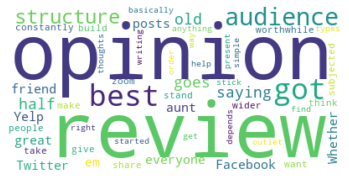

In [44]:
cloud_text = WordCloud(background_color="white", stopwords=stop_words).generate(text)
plt.imshow(cloud_text, interpolation="bilinear")
plt.axis("off")
plt.show()

In [45]:
# Import the required function
# from sklearn.feature_extraction.text import CountVectorizer 

# annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# # Build the vectorizer and fit it
# anna_vect = CountVectorizer()
# anna_vect.fit(annak)

# # Create the bow representation
# anna_bow = anna_vect.transform(annak)

# # Print the bag-of-words result 
# print(anna_bow.toarray())

In [46]:
# from sklearn.feature_extraction.text import CountVectorizer 
# vect = text

# # Build the vectorizer, specify max features 
# vect = CountVectorizer(max_features=100)
# # Fit the vectorizer
# vect.fit(reviews.review)

# # Transform the review column
# X_review = vect.transform(reviews.review)

# # Create the bow representation
# X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
# print(X_df.head())

In [47]:
from sklearn.feature_extraction.text import CountVectorizer 

# Build the vectorizer, specify token sequence and fit
vect = CountVectorizer(ngram_range=(1,2))
vect.fit(data.Phrase)

# Transform the review column
X_review = vect.transform(data.Phrase)

# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

MemoryError: Unable to allocate 110. GiB for an array with shape (156060, 94644) and data type int64

In [52]:
from nltk import word_tokenize

In [66]:
text = "Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome. The sky is pinkish-blue. You shouldn't eat cardboard"

In [67]:
#Different split() and nltk.work_tokenize()

split_text = text.split()
print("split_text: ", split_text)

tokenize_text = word_tokenize(text)
print("tokenize: ", tokenize_text)

split_text:  ['Hello', 'Mr.', 'Smith,', 'how', 'are', 'you', 'doing', 'today?', 'The', 'weather', 'is', 'great,', 'and', 'city', 'is', 'awesome.', 'The', 'sky', 'is', 'pinkish-blue.', 'You', "shouldn't", 'eat', 'cardboard']
tokenize:  ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


In [70]:
# Fequence of word
frequence = []

split = text.split()
for word in split:
    if word not in frequence:
        frequence.append(word)


number = []

for index in range(len(frequence)):
    print(frequence[index] , ":", split.count(frequence[index]))
    number.append( split.count(frequence[index]) )




Hello : 1
Mr. : 1
Smith, : 1
how : 1
are : 1
you : 1
doing : 1
today? : 1
The : 2
weather : 1
is : 3
great, : 1
and : 1
city : 1
awesome. : 1
sky : 1
pinkish-blue. : 1
You : 1
shouldn't : 1
eat : 1
cardboard : 1


In [ ]:
for word in text.split():
    

In [59]:
x = text.count("Hello")
x

1